In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Classification2D/chest-X-rays

/content/drive/.shortcut-targets-by-id/1wKSfO3aS4r8zRFUMxOvzXeHIfFXN1QGU/Classification2D/chest-X-rays


In [4]:
import pandas as pd 
import numpy as np
import pydot
from IPython.display import Image

from classifier.modules.graph import (
    get_graph, 
    get_adjacency_matrix, 
    get_label_correlation
)


In [5]:
nih_data = pd.read_csv('/content/drive/MyDrive/Classification2D/chest-X-rays/data/nih/nih_train_val.csv', index_col=0)
nih_data

,image_id,class_name,img_path,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000001_000.png,Cardiomegaly,/content/drive/MyDrive/Classification2D/NIH-Ch...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00000001_001.png,Cardiomegaly|Emphysema,/content/drive/MyDrive/Classification2D/NIH-Ch...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00000001_002.png,Cardiomegaly|Effusion,/content/drive/MyDrive/Classification2D/NIH-Ch...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00000002_000.png,No Finding,/content/drive/MyDrive/Classification2D/NIH-Ch...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00000003_000.png,Hernia,/content/drive/MyDrive/Classification2D/NIH-Ch...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,/content/drive/MyDrive/Classification2D/NIH-Ch...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
112116,00030802_000.png,No Finding,/content/drive/MyDrive/Classification2D/NIH-Ch...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112117,00030803_000.png,No Finding,/content/drive/MyDrive/Classification2D/NIH-Ch...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112118,00030804_000.png,No Finding,/content/drive/MyDrive/Classification2D/NIH-Ch...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
nih_classes = np.load('/content/drive/MyDrive/Classification2D/chest-X-rays/data/nih/nih_classes_14.npy')
nih_classes

array(['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
       'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration',
       'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia',
       'Pneumothorax'], dtype='<U18')

In [7]:
corr = get_label_correlation(nih_data, columns=nih_classes)
corr

,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
Atelectasis,1.0,0.03201,0.105805,0.019119,0.283329,0.036681,0.019033,0.003461,0.282377,0.063933,0.051042,0.04291,0.022666,0.066961
Cardiomegaly,0.133285,1.0,0.060879,0.045749,0.382925,0.01585,0.018732,0.002522,0.211455,0.036744,0.038905,0.039986,0.014769,0.017651
Consolidation,0.262053,0.036212,1.0,0.034712,0.275766,0.02207,0.016927,0.000857,0.261624,0.130705,0.091708,0.053782,0.026355,0.047782
Edema,0.095962,0.055145,0.070343,1.0,0.25749,0.013026,0.003908,0.001303,0.425966,0.056014,0.056882,0.02779,0.147634,0.014329
Effusion,0.245926,0.079823,0.096643,0.04453,1.0,0.026958,0.014117,0.001577,0.300368,0.094165,0.068484,0.063753,0.0202,0.074792
Emphysema,0.168521,0.017488,0.040938,0.011924,0.142687,1.0,0.014308,0.00159,0.178458,0.085453,0.045707,0.060016,0.009141,0.2969
Fibrosis,0.130486,0.030842,0.046856,0.005338,0.111507,0.021352,1.0,0.004745,0.204626,0.069395,0.098458,0.104389,0.006524,0.04745
Hernia,0.176211,0.030837,0.017621,0.013216,0.092511,0.017621,0.035242,1.0,0.145374,0.110132,0.044053,0.035242,0.013216,0.039648
Infiltration,0.16407,0.029506,0.061375,0.049311,0.201066,0.02257,0.017342,0.001659,1.0,0.058259,0.077712,0.0377,0.030411,0.047552
Mass,0.12781,0.017641,0.1055,0.022311,0.21688,0.037184,0.020235,0.004324,0.20045,1.0,0.156693,0.078174,0.012279,0.074542


In [8]:
smooth_corr = (corr >= 0.4).astype(int)
smooth_corr

,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
Atelectasis,1,0,0,0,0,0,0,0,0,0,0,0,0,0
Cardiomegaly,0,1,0,0,0,0,0,0,0,0,0,0,0,0
Consolidation,0,0,1,0,0,0,0,0,0,0,0,0,0,0
Edema,0,0,0,1,0,0,0,0,1,0,0,0,0,0
Effusion,0,0,0,0,1,0,0,0,0,0,0,0,0,0
Emphysema,0,0,0,0,0,1,0,0,0,0,0,0,0,0
Fibrosis,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Hernia,0,0,0,0,0,0,0,1,0,0,0,0,0,0
Infiltration,0,0,0,0,0,0,0,0,1,0,0,0,0,0
Mass,0,0,0,0,0,0,0,0,0,1,0,0,0,0


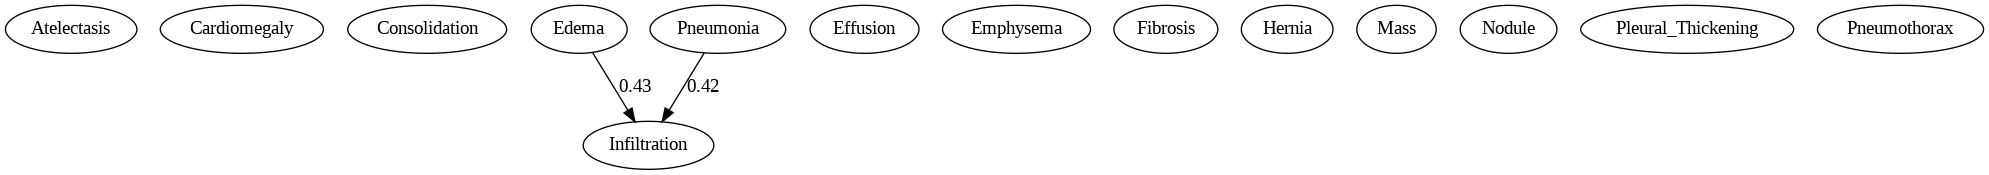

In [9]:
graph = get_graph(corr=corr)

graph.write_png("data/nih_graph.png")
Image("data/nih_graph.png")


In [10]:
nih_correlation = get_adjacency_matrix(smooth_corr=smooth_corr, neighbor_ratio=0.2)
nih_correlation

,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
Atelectasis,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
Cardiomegaly,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
Consolidation,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
Edema,0.0,0.0,0.0,0.888889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
Effusion,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
Emphysema,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
Fibrosis,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
Hernia,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0
Infiltration,0.0,0.0,0.0,0.117851,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.117851,0.0
Mass,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0


In [11]:
np.save("/content/drive/MyDrive/Classification2D/chest-X-rays/data/nih/nih_correlations_14.npy", nih_correlation)

**Vin**


In [12]:
vin_data = pd.read_csv('/content/drive/MyDrive/Classification2D/chest-X-rays/data/vinbigdata/vin_train_val.csv', index_col=0)
vin_data

,image_id,class_name,img_path,Aortic enlargement,Atelectasis,Calcification,Cardiomegaly,Consolidation,ILD,Infiltration,Lung Opacity,No finding,Nodule/Mass,Other lesion,Pleural effusion,Pleural thickening,Pneumothorax,Pulmonary fibrosis
0,50a418190bc3fb1ef1633bf9678929b3,No finding,/content/drive/MyDrive/Classification2D/vinbig...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,/content/drive/MyDrive/Classification2D/vinbig...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9a5094b2563a1ef3ff50dc5c7ff71345,Aortic enlargement|Cardiomegaly|Pleural effusi...,/content/drive/MyDrive/Classification2D/vinbig...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement|Cardiomegaly|Pleural thicke...,/content/drive/MyDrive/Classification2D/vinbig...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,063319de25ce7edb9b1c6b8881290140,No finding,/content/drive/MyDrive/Classification2D/vinbig...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,7c0ddf911bdb68fca14d7172486827cb,No finding,/content/drive/MyDrive/Classification2D/vinbig...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
14996,209e3a5c73c1195d805dd25d086b3c6d,No finding,/content/drive/MyDrive/Classification2D/vinbig...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
14997,1bea772246421c37929f8cbc43dba729,No finding,/content/drive/MyDrive/Classification2D/vinbig...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
14998,ae86eabab95525b41b8e79883ff1cef9,No finding,/content/drive/MyDrive/Classification2D/vinbig...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
vin_classes = np.load('/content/drive/MyDrive/Classification2D/chest-X-rays/data/vinbigdata/vin_classes_14.npy', allow_pickle=True)
vin_classes

array(['Aortic enlargement', 'Atelectasis', 'Calcification',
       'Cardiomegaly', 'Consolidation', 'ILD', 'Infiltration',
       'Lung Opacity', 'No finding', 'Nodule/Mass', 'Other lesion',
       'Pleural effusion', 'Pleural thickening', 'Pneumothorax',
       'Pulmonary fibrosis'], dtype=object)

In [14]:
corr = get_label_correlation(vin_data, columns=vin_classes)
corr

,Aortic enlargement,Atelectasis,Calcification,Cardiomegaly,Consolidation,ILD,Infiltration,Lung Opacity,No finding,Nodule/Mass,Other lesion,Pleural effusion,Pleural thickening,Pneumothorax,Pulmonary fibrosis
Aortic enlargement,1.0,0.024128,0.098142,0.6433,0.050864,0.0776,0.098468,0.251386,0.0,0.162374,0.236061,0.186175,0.436583,0.011412,0.306488
Atelectasis,0.397849,1.0,0.188172,0.204301,0.306452,0.11828,0.263441,0.553763,0.0,0.231183,0.446237,0.483871,0.66129,0.086022,0.698925
Calcification,0.665929,0.077434,1.0,0.384956,0.05531,0.112832,0.077434,0.25,0.0,0.413717,0.387168,0.192478,0.559735,0.006637,0.506637
Cardiomegaly,0.857826,0.016522,0.075652,1.0,0.044783,0.053043,0.078696,0.220435,0.0,0.121304,0.222609,0.151304,0.373043,0.007391,0.232609
Consolidation,0.441926,0.161473,0.070822,0.291785,1.0,0.090652,0.393768,0.84136,0.0,0.351275,0.308782,0.549575,0.549575,0.070822,0.529745
ILD,0.61658,0.056995,0.132124,0.316062,0.082902,1.0,0.354922,0.331606,0.0,0.202073,0.321244,0.266839,0.541451,0.012953,0.546632
Infiltration,0.492659,0.079935,0.057096,0.295269,0.226754,0.223491,1.0,0.616639,0.0,0.177814,0.28385,0.362153,0.525285,0.016313,0.675367
Lung Opacity,0.583207,0.077912,0.085477,0.38351,0.22466,0.096823,0.28593,1.0,0.0,0.29879,0.364599,0.410741,0.537065,0.039334,0.503782
No finding,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Nodule/Mass,0.602906,0.052058,0.226392,0.337772,0.150121,0.094431,0.131961,0.478208,0.0,1.0,0.397094,0.248184,0.496368,0.01937,0.460048


In [15]:
smooth_corr = (corr >= 0.45).astype(int)
smooth_corr

,Aortic enlargement,Atelectasis,Calcification,Cardiomegaly,Consolidation,ILD,Infiltration,Lung Opacity,No finding,Nodule/Mass,Other lesion,Pleural effusion,Pleural thickening,Pneumothorax,Pulmonary fibrosis
Aortic enlargement,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
Atelectasis,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1
Calcification,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1
Cardiomegaly,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
Consolidation,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1
ILD,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1
Infiltration,1,0,0,0,0,0,1,1,0,0,0,0,1,0,1
Lung Opacity,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1
No finding,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
Nodule/Mass,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1


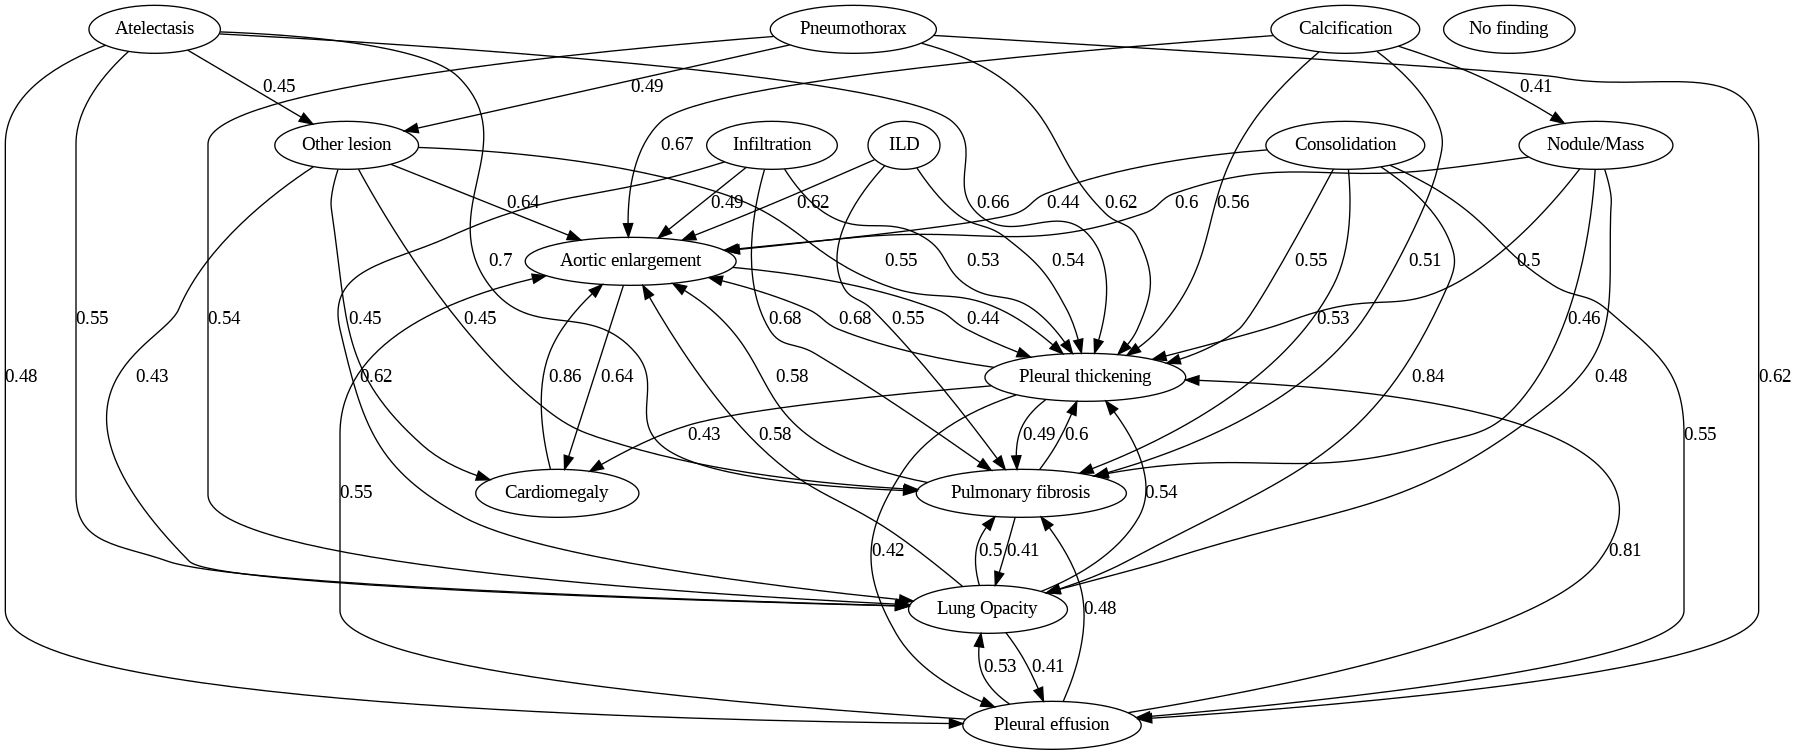

In [16]:
graph = get_graph(corr=corr)

graph.write_png("data/graph.png")
Image("data/graph.png")


In [17]:
vin_correlation = get_adjacency_matrix(smooth_corr=smooth_corr, neighbor_ratio=0.2)
vin_correlation

,Aortic enlargement,Atelectasis,Calcification,Cardiomegaly,Consolidation,ILD,Infiltration,Lung Opacity,No finding,Nodule/Mass,Other lesion,Pleural effusion,Pleural thickening,Pneumothorax,Pulmonary fibrosis
Aortic enlargement,0.888889,0.000000,0.022728,0.023281,0.000000,0.022728,0.022300,0.022728,0.0,0.022300,0.021765,0.022300,0.022972,0.000000,0.023027
Atelectasis,0.000000,0.850698,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Calcification,0.000000,0.000000,0.929796,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Cardiomegaly,0.116405,0.000000,0.000000,0.975610,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.114012,0.000000,0.000000,0.000000,0.000000
Consolidation,0.000000,0.000000,0.000000,0.000000,0.850698,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ILD,0.000000,0.000000,0.000000,0.000000,0.000000,0.929796,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Infiltration,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.895118,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Lung Opacity,0.000000,0.037057,0.000000,0.000000,0.037057,0.000000,0.038012,0.929796,0.0,0.038012,0.000000,0.038012,0.000000,0.033984,0.000000
No finding,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Nodule/Mass,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.895118,0.000000,0.000000,0.000000,0.000000,0.000000


In [18]:
np.save("/content/drive/MyDrive/Classification2D/chest-X-rays/data/vinbigdata/vin_correlations_14.npy", vin_correlation)